In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Task 1. 

Klout was a social media platofrm which allowed users to connect their social medias to it and in return it will calculate a klout score from 1-100, which measured a users popularity or clout through analysing their social media activity etc. We have a daaset which stores the distribution of Klout scores for 1048 users of the app and the following notebook looks particularily at the distribution of sample means for the Klout scores distribution. 

## Function to calculate the number of possible ways to choose a sample size of 250: 

In order to do this we can apply a formula from combinatorics which calculates the total number of possible ways to select $k$ items from a bucket of $n$ items where the order of the $k$ items is irrelevant. 

$n$ choose $k$ can be written as $ \binom{n}{k}$ and its formula is: 

$$  \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

where $!$ indicates the factorial operation 

This is because $n!$ is the number of possible ways to arange all of our $n$ items, $(n-k)!$ is the number of possible ways to arrange rest of the non k items whos permuatations we dont care about, so by dividing $n!$ by $(n-k)!$ we calculate the number of possible ways to select $k$ items from $n$ where order is important. However, if the order of our $k$ items is unimportant we can divide the number of possible ways to select $k$ from $n$ whch is $ \left( \frac{n!}{(n-k)!} \right) $ by the number of possible ways to order $k$ items which is $k!$

### Python Implementation 

In order to implement this function in Python we first need a function which can calculate factorials, below I have written a function to generate factorials using the recurisve formula which means that our factorial function will recurisvely call itself until we reach the base case which is where n is equal to 1. 

In [6]:
def fact(n): 
    if n ==1: 
        return 1 

    return n*fact(n-1) 

Plutting in our factorical function to create our combinatoric function. 

In [7]:
def nCk(n,k): 

    return fact(n) / ( fact(k) * fact(n-k) ) 

$k$ is equal to 250 as its the size of our desired samples, but to calculate $n4 we need to figure out how many users exist in our population of Klout scores. 

In [8]:
df = pd.read_csv('KloutScores.csv')
print(f'there is {len(df)} total users') 

there is 1048 total users


Plugging in $n$ =1048 and $k$ = 250 

In [9]:
nCk(n=1048, k=250) 

3.2830569965061e+248

Hence the total number of possible unique samples is  $ \approx 3.3\times{10^{248}} $, which is a massive number. 

## Generating random samples 

Below is a function to generate random samples from a list of data, using NumPys ```np.random.choice``` function which randomly selects k items from a list provided. 

In [262]:
def generate_random_samples(data : np.ndarray , num_samples : int, sample_size: int) -> np.ndarray: 
    samples = [np.random.choice(data, sample_size )  for i in range(num_samples) ]
    return np.array(samples ) 

The function above takes in 3 arguments, `data` which is the distribution you wish to sample from, `num_samples` which is the number of samples you wish to create and finally `sample_size` which is the size of each of your samples/ the number of datapoints in each sample. 

Below I will call the function on our distribution of Klout scores to extract a single sample with a size of 5. 

In [11]:
Klout_scores = df.scores.values 
generate_random_samples(Klout_scores, 1, 5 ) 

array([[87.24752923, 22.78947155, 40.45979461, 40.23515157, 55.35459706]])

## Plotting distribution of Klout scores

First we will begin by simply plotting the distribution of Klout scores using a bin size of 30. 

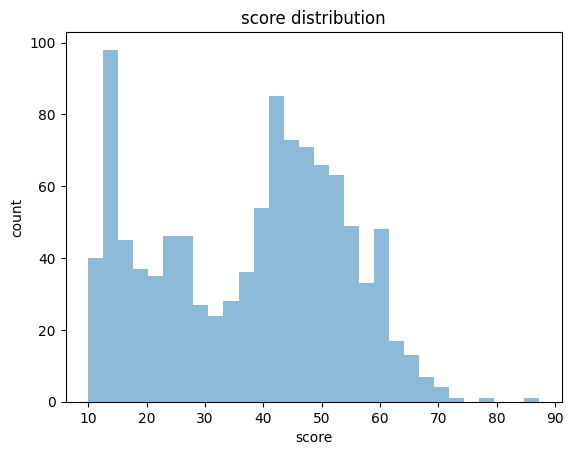

In [12]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins = 30 , alpha = 0.5 ); 

To plot the distribution of sample means, we will take 1000 samples and compute the mean of each. 

In [13]:
samples = generate_random_samples(df.values.flatten() , 1000, 250) 
samples

array([[34.63835594, 33.67810287, 36.0076138 , ..., 13.56783941,
        15.49848967, 53.76523753],
       [51.41591871, 16.72102885, 46.16543093, ..., 12.86750612,
        18.09681876, 40.15603384],
       [59.41168479, 45.41926482, 21.15531793, ..., 43.0905474 ,
        60.17035705, 22.84809796],
       ...,
       [11.06990754, 54.40578286, 36.78859761, ..., 46.16543093,
        45.07337621, 60.436156  ],
       [53.18396893, 51.2491939 , 43.58215684, ..., 65.03758813,
        25.89183094, 38.64552812],
       [53.86587764, 24.40950715, 60.52223486, ..., 38.41801004,
        31.71133035, 50.30152372]], shape=(1000, 250))

By inspect the shape of the `samples` array we can see that we have 1000 samples each with 250 values. 

In [14]:
samples.shape 

(1000, 250)

Calculating the mean of each sample to produce the distribution of sample means using `np.mean`. 

In [15]:
sample_mean_dist = np.mean(samples, axis = 1) 

## Plotting the distribution of Klout scores as well as the distribution of sample means 

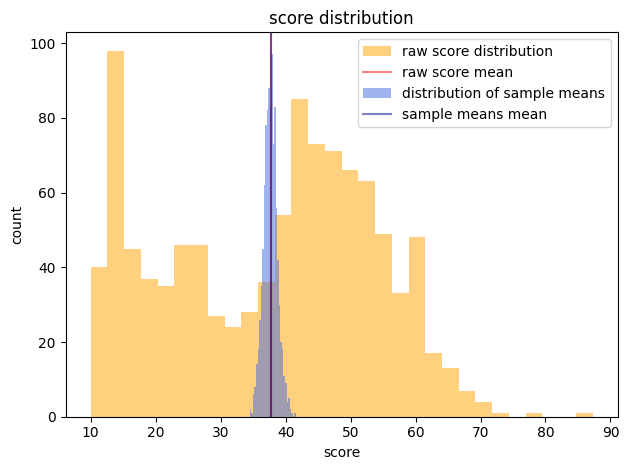

In [16]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins= 30, alpha = 0.5, label = 'raw score distribution', color = 'orange'  )
plt.axvline(np.mean(df.scores), label = 'raw score mean', color = 'red', alpha = 0.5  ) 
plt.hist(sample_mean_dist, bins = 30 , alpha = 0.5, label = 'distribution of sample means', color = 'royalblue' )
plt.axvline(np.mean(np.mean(df.scores)) , label = 'sample means mean', color = 'darkblue', alpha = 0.5   ) 
plt.tight_layout() 
plt.legend() ; 

### Distribution of sample means 

There are three main things we can pick out about the distribution of sample means which is plotted in blue on the figure above. 

The first is that the distribution of sample means seems to follow a normal distribution pattern with the majority of the sample means being centered around the mean of the sample means, Also the frequency of data points starts to tail off either side of the mean. 

The second is that the standard deviation of the distribution of sample means is far smaller when compared to the distribution of raw scores. 

Thirdly, the mean of the raw scores as well as the mean of the sample means are the same/very similar,  which is represnted by the overlapping of the red line (raw score mean) and blue line (mean of sample means) to creating a purple line which lies in the centre of both distributions. 

### Proving results about the distributions of sample means 

Below I will display the mathematical proofs about the properties of sampling means distribution which explain our findings about the distribution of sample means of Klouts above. 

First let $X$ be our distribution of Klout socres which we will assume can be modelled by a Normal Distribution $X \sim \mathcal{N}(\mu,\,\sigma^{2})$.

Currently we know  $(\mu, \sigma) $ for our distribution of Klout scores but we want to estimate the $(\mu, \sigma)$ for our distribution of sample means. 

We can define the distribution of sample means  $\bar{X}$ where $n$ is equal to the sample size as: 

$$ \bar{X} = \left( \frac{x_1 + x_2 + ... + x_n}{n}  \right) $$

Where $x_1, x_2, x_3, ... , x_i$ are all independent random variables sampled from $X$. 

Calculating the expected value/ mean for distribution $\bar{X}$, using [expectation algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables): 

$$ E(\bar{X}) = E\left( \frac{x_1 + x_2 + ... + x_) }{n}  \right )$$ 

Given that $E(X+Y) = E(X) + E(Y)$ where $X,Y$ are two random variables: 

$$ E(\bar{X}) = \left( \frac{ E(x_1) + E(x_2) + ... + E(x_n) }{n}  \right )$$ 

As $x_k$ is sampled from $X$, The expected value of $x_k$ is equal to the mean value of $X$ which is $\mu$. Hence, $E(x_k) = \mu $ which we can sub into the formula above: 

$$ E(\bar{X}) = \frac{1}{n}( \underbrace{ \mu + \mu + ... + \mu }_{n\text{-times}}  )$$ 

Rewriting our summation as a multiplication: 

$$ E(\bar{X}) = \frac{1}{n}( n\mu )$$ 

Simplifying: 

$$ E(\bar{X}) = \mu $$

As $\mu$ is the mean value for distribution of Klout scores which we defined above, This explains the behaviour seen in the graphs of the distributions above where mean/expected value in our distribution of sample means was equal to the mean value in our distribution of Klout scores. 

### proving the result for the standard deviation 

To calculate the standard deviation of $\bar{X}$ (distribution of sample means) we will apply the two following [Variance Algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables) rules: 

$$ VAR \left(x_1 + x_2 + ... + x_n \right) = VAR(x_1) + VAR(x_2) + ... + VAR(x_n)  $$
$$ $$ 
$$ VAR \left(aX  \right)  = a^{2}VAR(X) $$ 
$$ $$ 

Calculating the expected variance of our distribution of sample means $VAR(\bar{X} ) $ 

$$ VAR(\bar{X} )  = VAR \left(\frac{x_1 + x_2 + ... + x_n }{n } \right ) $$

Where $x_1, x_2, x_3, ... , x_i$ are all independent random variables sampled from $X$. 


Applying both of the variance algebra rules above gives us the following: 

$$ VAR(\bar{X} )  = \frac{ VAR(x_1 )+ VAR(x_2) + ... + VAR(x_n) }{n^{2}}  $$ 

The expected variance for an individual sample $x_k$ can be defined by the variance of our Klout score distribution $X$ which is $\sigma^{2}$. Hence $VAR(x_k) = \sigma^{2} $, subbing this into the equation above: 

$$ VAR(\bar{X} )  =  \frac{1}{n^{2}} \left (\underbrace{ \sigma^{2} + \sigma^{2} + ... +  \sigma^{2} }_{n\text{-times}} \right )  $$ 

Converting our summation into a multiplication: 

$$ VAR(\bar{X} )  =  \frac{1}{n^2} \left ( n \sigma^{2}  \right )  $$ 

Simplifying: 

$$ VAR(\bar{X} ) =  \frac{\sigma^{2} }{n} $$ 

To calculate the expected standard deviation we simply have to square root our expected variance: 

$$ \sigma(\bar{X}) = \frac{\sigma}{\sqrt{n} } $$ 

Once, again we can that this results lines up with our findings above given that the standard of our distribution of sampling means was significantly smaller than the standard deviation of the distribution of Klout scores. 

Calculating the mean and standard deviation of the normal distribution describing the distribution of sample means using the formulas dervived above. 

In [17]:
original_mean = np.mean(df.scores.values) 
original_std = np.std(df.scores.values) 
sample_std = ( original_std / np.sqrt(250)  ) 

In [18]:
print(f'mean of sample means distribution: {round(original_mean, 2) }, std of sample means distribution: {round(sample_std, 4) } ') 

mean of sample means distribution: 37.72, std of sample means distribution: 1.0142 


###  Comparing the expected values with our observed values. 

In [19]:
sample_mean_observed = np.mean(sample_mean_dist) 
sample_std_observed = np.std(sample_mean_dist) 

print(f'mean of sample means distribution: {round(sample_mean_observed, 2) }, std of sample means distribution: {round(sample_std_observed, 4) } ')

mean of sample means distribution: 37.65, std of sample means distribution: 1.0509 


Comparing our observed mean and standard deviation to mathematical formula, we can see that both the mean and standard deviation are extremely close to one another with a rough diffeence of ~0.07 for the means and ~0.035 for the standard deviations. The gap between our observed values and ones predicted by the equations dervived will likely shrink as we increase the size of our samples, this is known as the central limit theorem. 

We can illustrate this idea with plotting our our sample of 1000, with varying sample sizes 

## BieberTweetter 

For the sample of BieberTweetters we can say that $n=250$ and $\mu = 40 $

A sample mean of 40 would fall to the right of the distribution of sample means. Below is both the emprical and normal approximation distributions with the sample mean of 40 plotted. 

In [20]:
# importing normal probability density function from scipy 
from scipy.stats import norm 

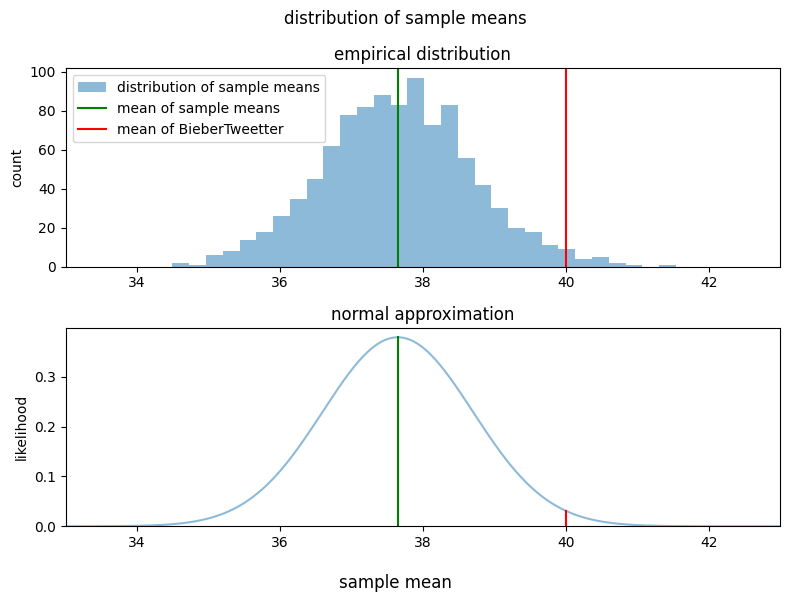

In [267]:
fig, ax = plt.subplots(2, figsize = (8,6  ) )

xmin,xmax = 33, 43 

#plotting the distribution of observed values 

ax[0].hist(sample_mean_dist, bins = 30 , alpha = 0.5 , label = 'distribution of sample means')
ax[0].axvline(np.mean(sample_mean_dist), label = 'mean of sample means', c = 'green'  ) 
ax[0].axvline(40, label =  'mean of BieberTweetter', c = 'red' ) 
ax[0].set_xlim(xmin, xmax ) 
ax[0].set_ylabel('count') 
ax[0].set_title('empirical distribution') 

#plotting the empirical distribution 

x_values = np.linspace(xmin, xmax , 1000)
#initialing a normal distribution 
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

ax[1].plot( x_values, mean_dist.pdf(x_values), alpha = 0.5   ) 

ax[1].plot( ( np.mean(sample_mean_dist), np.mean(sample_mean_dist) ) ,  ( mean_dist.pdf(37.7)  , 0 )  , c= 'green' ) 
ax[1].plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'red')
ax[1].set_xlim(xmin, xmax) 
ymin, ymax = ax[1].get_ylim() 
ax[1].set_ylim(0, ymax) 
ax[1].set_ylabel('likelihood') 
ax[1].set_title('normal approximation')

#plotting general titles 
midpoint = (fig.subplotpars.right + fig.subplotpars.left ) / 2 
fig.supxlabel('sample mean')
fig.suptitle('distribution of sample means', x = midpoint ) 
fig.tight_layout() 
ax[0].legend(); 

We can see that for both the empirical and normal approximation curve that the a sample mean of 40 compared to other samples of size 250, falls to the right of the distribution. Hence, it seems quite rare to acheive a sample with a mean of 40. 

### Likelihood that the mean of a sample is above 40 

Calculating the likelihood that a randomly selected sample of 250 users has a mean of at least 40. This likelihood / probability is represented by the total area underneath the probability density function curve where sample means >= 40. 

Below is a plot of the normal approxmation of the distribution of sample means, where the area of the green section represents the probability of a sample having a mean greater than 40. Though its worth noting that this green area extends to infinity as the likelihood tends to zero but for the sake of plotting I have only shown it up to a sample mean of 43 

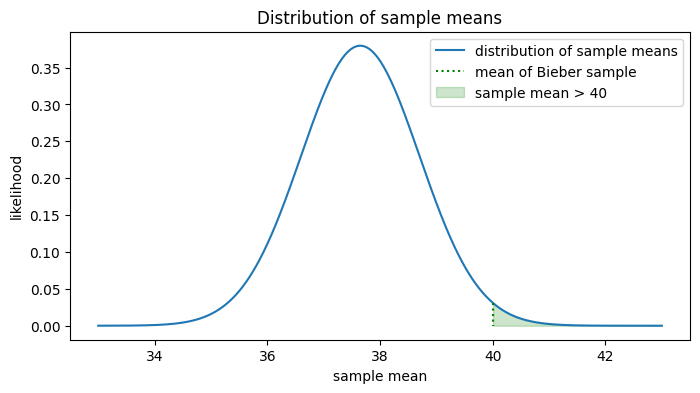

In [22]:
from scipy.stats import norm 
x_values = np.linspace(33, 43 , 1000)
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

plt.figure(figsize = (8,4)  ) 
plt.plot( x_values, mean_dist.pdf(x_values), label = 'distribution of sample means'  ) 

plt.plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'green', linestyle = ':' , label = 'mean of Bieber sample ')

plt.fill_between( x=  x_values, 
                y1 = mean_dist.pdf(x_values) , 
                where= (x_values >= 40 ) , 
                color= "green",
                alpha= 0.2 , label = 'sample mean > 40 '  ) 

plt.legend()

plt.xlabel('sample mean') 
plt.ylabel('likelihood') 
plt.title('Distribution of sample means' );  

Calculating the green area which represents our desired probability, involves integrating our probability distribution function between the limits of  $40$ and $+\infty$

$$ \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $\mu$ is the mean $\sigma$ is the standard deviation of the distribution of sample means. 

To compute this we can use a SciPys cummulative desnisty function `cdf`, which calculates calculates the following integral for a given normal distribution paramterised by $\mu$ and $\sigma$. 

$$ \int_{-\infty}^{b} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $b$ the upper limit is the input into the `cdf` function. 

Given that total area under a normal distribution is equal to one we can write: 

$$  \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   + \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  = 1 $$ 

SciPys `cdf` can be used to compute the first term which we can then substract from 1 to get the green area which represents the probability of a sample having a mean which is at least 40. 

$$   \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   =1  - \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx $$ 



In [23]:
aoc = (1 - mean_dist.cdf(40) ) 
print(f'the probability that our sample mean is greater or equal to 40 is { round(aoc * 100,2 ) }% ') 

the probability that our sample mean is greater or equal to 40 is 1.27% 


So if the distribution of Klout scores for BieberTweetter users is identical to the distribution of all Klout scores, this means that the achieved sample mean of 40 is extremely very unlikely as the probability of achieving a sample mean of 40 or greater is only ~1.27%. 

## Constructing a confidence interval 

We want to create a confidence interval at the 95% level for the mean Klout score if everyone  used BieberTwetter, which in other words means we want to find the range of values such that the probability that the mean Klout score if everyone used BieberTweetter would exist within that range is 95%. 

We know thaat a single sample of 250 BieberTweetter users has a mean Klout score of 40.

The formula for confidence intervals can be defined as : 

$$ (\mu_s -  me, \mu + me  )$$

$me $ represents the margin of error which is the maximum expected distance between our observed statistic and the true but unknown population population parameter. In our case margin of error represents the maximum expected distance between our sample mean $\mu_s$ of BieberTweetter users (observed statistic)  and the mean Klout score if everyone used BieberTweetter (unknwon population parameter). 

The margin of error can be defined as the following: 

margin of error = critical value * standard deviation of the sampling distribution if everyone used BieberTweetter. 

The critical value is defined by the confidence level, the area between the positive and negative critical value on a standard normal distribution is equal to the confidence level. E.g. for a confidence level of 0.95 / 95% our critical value is 1.96 as: 

$$ \int_{-1.96}^{1.96} \mathcal{N}(0, 1  )(x) \,\,\ dx  = 0.95  $$ 

We wish to construct a confidence interval with a confidence of 95% this means that our critical value as displayed above is 1.96.

The the standard deviation of the sampling distribution is multiplied by our critical value in order to scale the critical value to non standard normal distributions with standard deviations greater or lesser than 1. Its also important to note that the standard deviation of the sampling distribution if everyone used BieberTweetter is equal to current standard deviation of the disribution of sample means, as we are making the assumption that if all users where to start to use BieberTwetter this would essentially shift all users Klout scores by a constant $k$ but would have no effect on the spacing of Klout scores meaning that both distributions would have the same standard deviation. 

Now that we have a mean of a sample of BeiberTweeter users, as well as the standard deviation of sample means if everyone where to use BieberTweetter we can calculate our margin of error and then construct our confidence interval which is displayed below. 

In [24]:
lower_bound =  round(40 - float(2* sample_std) , 2 ) 
upper_bound = round( 40 + float(2* sample_std) , 2 ) 

print(f'95% confidence interval {(lower_bound, upper_bound )}')

95% confidence interval (37.97, 42.03)


This interval describes the range of values which are 95% confidence the mean Klout score if all users where to begin to use BieberTweetter lies. Its worth noting that the mean Klout score is currently 37.7 which lies outside of this confidence interval.

So if all users where to begin to use BieberTweetter it is unlikely that 

similar to the above where we calculated the probability of a sample having a mean greater than 40 this means that if all users where to begin to use BieberTweetter it is unlikely that the mean Klout score would be 37.7 as it falls outside of our confidence interval at a 95% level. 

# Task 2. 

New York traffic collision & weather dataset. The dataset shown below describes the weather conditions and the total number of collisions on a given day. An insurance company is hoping to use this data to draw a link between the total number of collisions and the weather conditions for a particular day in order to help them make smarter pricing decisions. E.g. if it were the case that days with rain lead to a larger number of total collisions then our insurance company may want to increase the price of their premiums for predicted rainy  days due to the increase probability of a collision. So that they can more accurately price the risk they are taking on by ensuring drivers on a given day with particular weather conditions / forecasted weather conditions. 

# Data Loading and Cleaning 

In [261]:
df = pd.read_csv('New_York_collisions_and_weather_data.csv')
df.head() 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


In the data above each record represents an individual day, a breakdown of all individual features is shown below. 

`day` - day of week for the particular day 

`year` - year which day was in 

`mo` - month which day was in 

`da` - day of month of the particulr day 

`collision_date` - date for the particular day 

`temperature` - mean temperature for the day in Fahrenheight, missing = 9999.9

`dewp ` - Dew Point, the temperature which the current temperature would have to drop to in order to each 100% humidity, higher typically means more humid , missing = 9999.9

`slp` - Mean sea level pressure for the day in millibars to tenths , missing= 9999.9

`visib` - Mean visibility for the day in miles to tenths, missing = 999.9

`wdsp` - Mean windspeed for the day in knots to tenths, missing = 999.9

`gust` - Maximum sustained windspeed reported for the day in knots to tenths, missing = 999.9

`max` - Maximum Temperature reported during the day in Fahrenheight to tenths , missing = 9999.9

`min` - Minimum Temperature reported during the day in Fahrenheight to tenths, missing = 9999.9 

`prcp` - Total Precipation reported during the day in inchies and hundredths, missing = 99.99 

`sndp` - Snow Depth in intches to tenth, missing = 999.9 if there is no snow it is usually not reported leading to a missing value 


## Data cleaning 

In our dataset missing values are replaced with numerous placeholders depending on the feature ( 99.99/999.9 / 9999.9)  these missing values can either be cleaned from our table e.g. removing all rows which contain missing values or instead we could impute values in place of the missing values using either statical methods (mean/linear imputation ) or the hints left above around missing values. 

Given that there are multiple values which could indicate a missing value for continous features, the function below will display a table which shows the proportion of values in each column which are the missing value indicator shown in the index 

In [26]:
for idx, missing_value_indicator in enumerate([99.99, 999.9 , 9999.9 ]):
    
    if idx == 0: 
        missing_value_prop = (df == missing_value_indicator).mean() 
    else:
        missing_value_prop = pd.concat( (missing_value_prop,  (df == missing_value_indicator).mean() ) , axis = 1)

In [27]:
missing_value_prop.columns = [99.99, 999.9, 9999.9 ] 
missing_value_prop.T.round(2) 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
99.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
999.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.05,0.05,0.37,0.0,0.0,0.0,0.92,0.0,0.0
9999.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0


### Deciding on the best stratgegies for each of the columns with missing values 

`sndp` which is the snow depth has 92% missing values. However, it's common that stations do not report zeros for days with no snow and only report the actual snow depth on days with snow, so all missing values will be replaced with 0s to represent no snow. 

`gust` also has a fairly high proportion of missing values 0.37, though there is no information provided around why these values may be missing, so mean inputation will be used. 

`wdsp`, `slp`, `visib` , `mxpsd` - All have fairly low levels of missing values when compared to the previous to features but similar to  `gust` there is no added info provided around the missing values hence we will use mean imputation


### replacing missing values 

Zero inputation for `sndp` 

In [28]:
df['sndp'] = df['sndp'].replace(999.9 , 0 ) 

Mean Imputation for `gust`, `wdsp`, `slp`, `visib`, `mxpsd`. 

In [66]:
# dictionary defining each feature and the value which is used to represent missing values

feature_missing_indicator = {'gust' : 999.9 , 'wdsp' : 999.9 , 'slp' : 9999.9 , 'visib' : 999.9 , 'mxpsd'  :999.9 } 
for feature, indicator in feature_missing_indicator.items(): 
    df[feature] = df[feature].replace(indicator, df[feature].mean() ) 

### converting dates to pandas datetime dtype 

Currently the collision date is sotred in our dataframe as a string, we can convert this to a pandas datetime object which will make any future calculations regarding the collision date easier. 

In [30]:
df.collision_date = pd.to_datetime(df.collision_date, dayfirst = True ) 

### printing cleaned table 

In [31]:
df.head() 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,0.0,0,381
1,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,0.0,0,480
2,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,0.0,0,549
3,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,0.0,0,505
4,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,0.0,0,389


## Bivariate Analysis of the features 

Given that the insurance company is interested in linking our time/weather features to the number of collisions on a given day, we will first measure the correlation between each of our features and the number of collisions on a given day.

The results of this Bivariate analysis/correlation study should inform us around which features e.g. days of week or particular weather conditions should the insurance company


Its important to note that our dataset currently contains both continous and discrete features, different techniques must be applied to calculate the correlation between our continous features and the number of collisions when compared to our discrete features. For our continous features we can simply calculate the Peasrons Correlation Coefficeint which is also known as the r score and for our discrete features will create scatter plots which we can then use to interpret the correlations. 

In [32]:
continous_features = ['temp','dewp','slp', 'visib', 'wdsp','mxpsd','gust','max','min','prcp', 'sndp' , 'day' , 'fog' , 'NUM_COLLISIONS']
dateime_features = ['collision_date'] 
categorical_features = ['day', 'year', 'mo' , 'fog' ] 

`day` appears in both of the lists for continous as well as categorical features. Given that each day of the week is represented using an integer this means we are able to treat it is a both a continous and a categorical feature. 

(I may simply omit this one ) 

## Measuring Pairiwse Correlation between continous features 

Below is a heatmap which displays the pearsons correlation coefficient between each pair of continous features in our dataset. A Pearsons correlation ranges between -1 and 1, with 1/-1 indiciating perfect positive/negative correlation that two features are parallel to eachother and 0 indicating that there is zero correlation and the two features are perpendicular to each other.

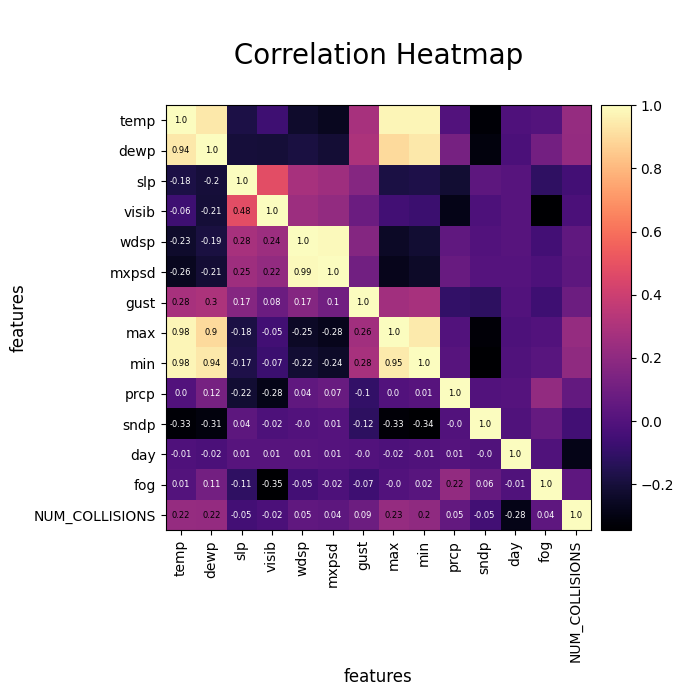

In [33]:
import matplotlib as mpl 
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig,ax = plt.subplots( 1,   figsize = (6,6)  )

correlation_matrix = df[continous_features].corr().values


heatmap = ax.imshow( correlation_matrix , cmap = 'magma') 

for i in range(len(continous_features) ): 
    for j in range(i, len(continous_features)  ): 
        if correlation_matrix[i,j] > 0.2: 
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center'  ) 
        else:
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center' , c = 'white' ) 
      # plt.text(j,i , round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center'  ) 

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='7%', pad=0.1 ) 

fig.colorbar(heatmap, cax = cax  ) 

ax.set_xticks(np.arange(len(continous_features) ) , continous_features , rotation = 90 ) 
ax.set_yticks(np.arange(len(continous_features)) , continous_features )

ax.set_title('\n Correlation Heatmap \n ' , size = 20 )  
ax.set_xlabel('features', size = 12  ) 
ax.set_ylabel('features', size = 12  ) ; 

Given that we are interested in using weather/time data in order to predict  ```NUM_COLLISIONS```, we will primarly be focusing on the bottom row of our heatmap which displays each of the pairwise correlations with `NUM_COLLISIONS`. Across the board we can see that the correlation between our features `NUM_COLLISIONS` seems quite weak with no feature achieving an r score above 0.3. 

### Positive feature correlations with `NUM_COLLISIONS` 

Interepreting the correlations for all features with a r score above 0.05 for `NUM_COLLISIONS`.

- ` temp ` : The mean Temperature achieves an r score of 0.22, which means that there is a weak positive correlation between mean Temperature for a given day and the number of collisions. This could be as the warmer the weather the more people are outside attending events etc leading to an increase in the number of pedestrians as well as drivers.
  
- `dewp`, `max` , `min` : all have similar r scores to `temp` of 0.22, 0.23, 0.22 respectively. This is likely a result of each of these individual features being highly correlated with `temp` with r scores of 0.94, 0.98, 0.98 respectively. As each of these features are highly correlated with `temp` this is inturn explains why they have similar correlations between themselves and `NUM_COLLISIONS` as `temp`.

- `gust` : has a r score of 0.09 which represents little to non positive correlation, but this small correlation may be a result of greater amounts of wind leading to a reduction in the control drivers have over their vehicles. 
   
### Negative feature correlations with `NUM_COLLISIONS` 

Interprenting correlations for all features with a r score below -0.05 for `NUM_COLLISIONS`. 

- `day` : The day of week as a continous feature achieves the strongest correlation with `NUM_COLLISIONS` out of all features in our dataset, with a R score of -0.28 which is likely cause  fall in the number of commuters and in turn total road users on the Saturday/Sunday which are encoding with the largest integers 6 and 7 respectively

### Features with none/negible correlation 

I have defined all features with none / negible correlation as those with a r score in the range $(-0.05, 0.05)$

Surprsingly many weather based features seem to have very little correlation with the total number of collisions. E.g. both `prcp` (rainfall) and `sndp` (snowfall) which both lead to reduced friction between cars on the road both r scores close to zero. In a similar vain both `fog` and `visib` (visibility) which can impact drivers vision seem to be uncorrelated/very loosely correlated with the the total number of collisions.

The comments above also apply to the following wind based feature features `mxspd`( maximum wind speed) and `wspd` (mean wind speed ). 

Finally `slp` ( mean sea level pressure) is quite strongly correlated with `visib` but when compared to the other features the reduced correlation seems to agree with more with existing biases around weather events and car collisions. 

### No. Collisions Vs Rate of Collisions 

One possible reason why we see such low correlation between each of our weather based features and the total number of collisions, is that it may be the case that our weather based features e.g. `prcp` (rainfall) are correlated with the rate of collisions $\left(\frac{\text{no. collisions}}{\text{no. drivers}} \right)$ rather than the total number of collisions. E.g. A rainy day may lead to less people driving on the roads but a greater risk of a collision due to the rain could mean that there is the same number of collisions on a rainy day as a dry day. Hence, it may be worthwhile for the insurance company to aim to predict the rate of collisions on a given day rather than the total number of collsions as it more accurately represents the risk they are taking by ensuring drivers. 

E.g. Below we pring the mean number of collisions of days with zero precipatation and days with and without precipitation. 

In [165]:
#printing the mean number of collisions on days with rain 
df[df.prcp > 0 ].NUM_COLLISIONS.mean() 

np.float64(604.9240506329114)

In [166]:
# printing the mean number of collisions on days without rain 
df[df.prcp == 0 ].NUM_COLLISIONS.mean() 

np.float64(600.2798789712557)

We can see that they are nearly identical, but given that we dont have any information on the total number of drivers on each given day we are unable to calculate the rate of collisions. 

## Plotting the corelation between categorical features and the total number of collisions 

Below is a plot which displays the individual scatter plots between each of our categorical variables ahd the total number of collisions on a given day 

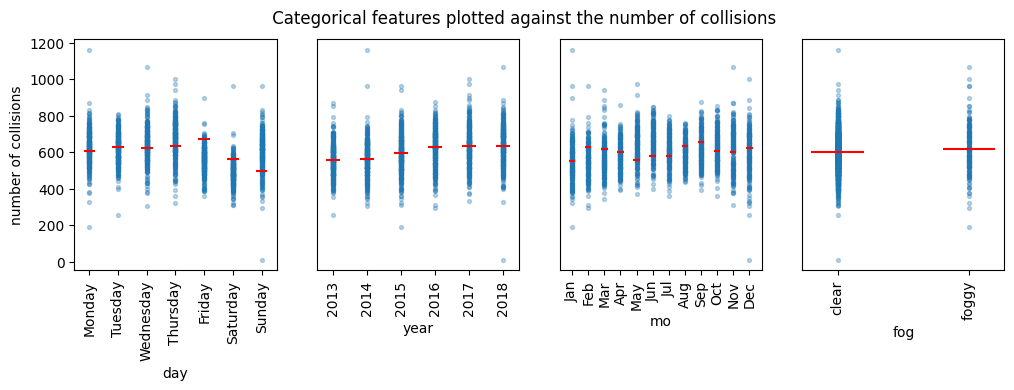

In [203]:
import math 

for feature in categorical_features:
    df[feature] = df[feature].astype('string')

#setting the number of subplots equal to the number of features we wish to plot 
n_subplots = len(categorical_features)

fig, ax = plt.subplots( 1, n_subplots , figsize = (12,  3   ) ) 

fig.suptitle(' Categorical features plotted against the number of collisions ')

#dictionary defining the xticks are currently days of week and months of year are encoded using integers 
xticks_dict = {'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              'mo': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
              'fog' : ['clear', 'foggy' ] }


y_idx = 0 
for idx, categorical_feature in enumerate(categorical_features): 

    #only want to set a y label for the first plot as it will be shared between the rest 
    if idx == 0:
        ax[idx].set_ylabel('number of collisions') 
    else:
        ax[idx].set_yticks([]) 


    ax[idx].set_xlabel(categorical_feature)
    
    ax[idx].scatter(df[categorical_feature], df.NUM_COLLISIONS, s= 8 , alpha = 0.3  ) 

    #if our feature has predefined xticks(day,month) assign them to our plot else use the existing onces
    if xticks_dict.get(categorical_feature):
        xticks = xticks_dict.get(categorical_feature)
    else: 
        xticks = ax[idx].get_xticklabels() 
        
    ax[idx].set_xticks(np.arange(len(xticks) ) , xticks, rotation = 90 ) 

    #calculating the mean number of collisions for each setting of our discrete variable and plotting it 
    means = df.groupby(categorical_feature)['NUM_COLLISIONS'].mean() 
    for i,mean in enumerate(means):
        ax[idx].hlines(mean, i - 0.2, i + 0.2,  color = 'red'   ) 

    if idx % 2 == 0: 
        y_idx = +1 

The scatter plots have been plotted with an alpha of 0.5, meaning that darker blue areas imply greater frequency of points and the red  bars indicate the mean number of collisions for each setting of our discrete variable. 

-  `day` : The mean number of collisions rises gradually through the week until Friday where it shoots up and then falls back down again on Saturday and Sunnday. This is likely a result of less people driving on the weekends due to less commuting, with Friday likely being the higest as it is a mix of commuting as well as socail events etc. 

-  `year` : We can see that there was a gradual rise in the number of collisions each year with it starting to plateu in 2017. 

- `mo` : the mean number of collisions seems to fluctuate throught the months. Sepetember with the highest mean collisions, this could potentially be caused by people beginning to back to school/work. January has the lowest mean which could be a result of poor weather and a quieter period following winter festivities. 

- `fog` : We can observe little difference between foggy and clear, with foggy being marginally higher which is expected given that fog can lead to reduced visibility increasing the chance of a road accident. But as mentioned previously it is likely that fog has a much larger impact on the rate of collisions rather than the total number of collisions. 

## Sine transform to day of week feature. 

When looking at the scatter graph of day of week plotted against the total number of crashes, we observe some level of wave/ sinusoidal like behaviour as the number of collisions rises until friday and then falls on both saturday and sunday. This pattern is vaguely similar to a sine wave between $(0, \pi)$, which I have plotted below. 

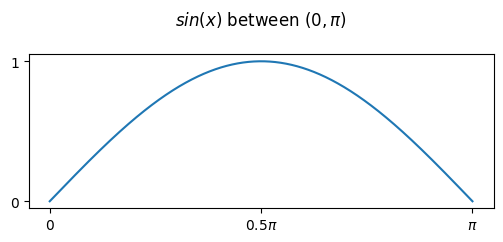

In [35]:
plt.figure(figsize = (6,  2 ) ) 
xvals = np.linspace(0, np.pi, 10000 ) 
yvals = np.sin(xvals) 
plt.plot(xvals, yvals ) 
plt.xticks([0, np.pi /2 , np.pi  ] , ['0' , '$0.5\pi$',  '$\pi$'] ); 
plt.yticks([1, 0  ] )
plt.title('$sin(x)$ between $(0,\pi)$ \n'  ); 

In order to improve teh correlation between day of week stored as a continous feature and the number of collisions, we can apply the following sine transformation: 

$$ \hat{x} = sin \left(\frac{x\times{\pi}}{n } \right)$$

where $x$ is the integer representing the day of the week, $n$ is 7 (the number of days in a week) and $\hat{x}$ is our transformed value. 

Below is a graph displaying the sine transformation of days of week described above, where the height of day of week represents its new value. 

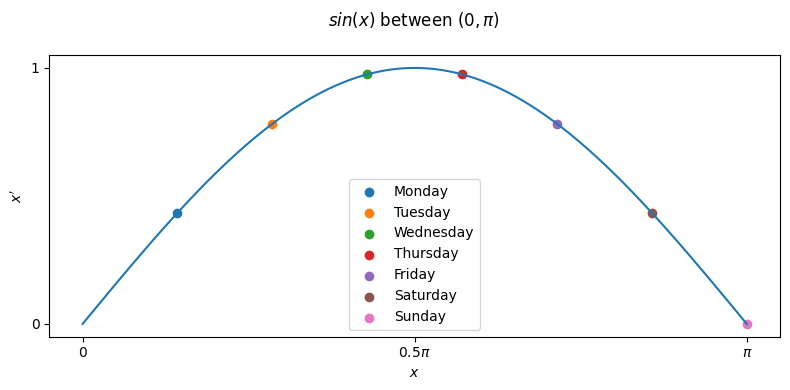

In [36]:
plt.figure(figsize = (8, 4  ) ) 
xvals = np.linspace(0, np.pi, 10000 ) 
yvals = np.sin(xvals) 
plt.plot(xvals, yvals ) 
plt.xticks([0, np.pi /2 , np.pi  ] , ['0' , '$0.5\pi$',  '$\pi$'] ); 
plt.yticks([1, 0  ] )
plt.title('$sin(x)$ between $(0,\pi)$ \n'  )
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ] 
for idx, day in enumerate(days_of_week):
    xval = (idx + 1 ) * (np.pi / 7)
    yval = np.sin(xval) 
    plt.scatter( xval, yval  , label =  day )

plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.tight_layout() 
plt.legend(); 

From looking at the graph we can see that our sine transformation doesnt completelt represent the relationship between day of week and no. collisions perfectly, it shows wednesday and thursday with the highest transformed values compared to collision data where friday is the day of week is the highest number of collisions. However, it still captures the rough trend in the data and should hence lead to an improvement in the correlation between day of week and total number of collisions. 

Calculating the correlation coefficient between our sine transformed day of week feature and total number of collisions. 

In [195]:
df.day = df.day.astype('int') 
day_sine = df.day.apply( lambda x : np.sin(  np.pi  * ( x / 7 ) )  ) 
float(round(np.corrcoef(day_sine, df.NUM_COLLISIONS)[0][1], 2)) 

0.46

The sine transform led to an increase in the correlation between our day of week feature and the total number of collisions from ~ -0.26 to ~ 0.46, the strength of the correlation increased but also the direction has reversed from a negative to a positive correlation. 

### One Hot encoding day of week feature

(possibly have a think about removing this feature it doesnt necessarily need to be here ) 

Despite transforming the day of week feature using a sine curve to better match the rise and fall of collisions during the week, it may be more sensible to encode the day of the week feature using one hot encodings, where we create a seperature feature for each individual day of week where 1 indiciates if a particular row corresponds to a given day of the week. 

In [64]:
days_of_week_df = pd.get_dummies(df.day ).astype('int') 
days_of_week_df['collisions'] = df.NUM_COLLISIONS
days_of_week_df.head() 


,1,2,3,4,5,6,7,collisions
0,0,1,0,0,0,0,0,381
1,0,0,1,0,0,0,0,480
2,0,0,0,1,0,0,0,549
3,0,0,0,0,1,0,0,505
4,0,0,0,0,0,1,0,389


In [65]:
 days_of_week_df.corr().loc[:, ['collisions'] ]

,collisions
1,0.004239
2,0.098392
3,0.075471
4,0.134544
5,0.286025
6,-0.168215
7,-0.430455
collisions,1.000000


## Regression Analysis 

(possibly add a little introduction to what linear regression is ) , ordinary least squares optimisation etc.. 

Given that the insurance company is interested in predicting the number of collisions in a day given particular weather/time condictions, we will now train a linear regression model to predict `NUM_COLLISIONS` using our weather and time beased features. If our model is accurate it can be used by insurance company to more accurately price the risk they are taking on through insuring drivers on a particular day. 

As we are using a Linear Regression model, it leverage the linear correlations between our features and the target variable `NUM_COLLSIONS` which we explored previously to predict `NUM_COLLISIONS`. 

In [122]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score 

Printing the first five rows of our dataframe 

In [123]:
df.head() 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,0.0,0,381
1,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,0.0,0,480
2,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,0.0,0,549
3,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,0.0,0,505
4,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,0.0,0,389


Given the context of the car insurance company looking to predict the total number of collisions in a given day so that they can price the associated risk correctly, there are a couple features which are worth dropping from our dataset as they would not be available in a real world scenario.

`collision_date` : Training a linear regression model with `collision_date` will result in a learnt weight for each individual day inside of the datase. The insurance company is interested in forecasting the number of collisions in the future which the model as no `collision_date` weights for. 

`year` : A similar approach can be taken to the `year` column and it can force the model to learn the average behaviour over a given year, but wont be useful for predicting `NUM_COLLISIONS` for future years. 

`da` : `day` represents day of the month will also be removed given that it is likely to be random noise

`NUM_COLLISIONS` : as if it were available then there would be no need to predict it / not available at inference time. 

In [249]:
# Dropping features mentioned above
X_df = df.drop( [ 'year', 'da',  'collision_date', 'NUM_COLLISIONS'] ,  axis = 'columns' ) 
# X_df = df[ ['day','mo', 'temp' ] ] 

Calling `pd.get_dummies` which will create one encodings for all categorical features in our dataframe  e.g. `day` `month` `fog` etc. This will split out each of the individual settings of a categorical/discrete feature into their own feature. For example, our date feature will be split out into seven seperate features each of which store a True/False value indicating whether or not it is the current day. 

In [250]:
# Converting our day feature to string as get_dummies classifies categorical features as those with a string datatype. 
X_df.day = X_df.day.astype('str') 

#creating our feature matrix X and target vector y
X = pd.get_dummies(X_df)

y = df['NUM_COLLISIONS']

Printing the first 5 rows of our feature matrix $X$ 

In [251]:
X.head() 

,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,...,mo_2,mo_3,mo_4,mo_5,mo_6,mo_7,mo_8,mo_9,fog_0,fog_1
0,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,...,False,False,False,False,False,False,False,False,True,False
1,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,...,False,False,False,False,False,False,False,False,True,False
2,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,...,False,False,False,False,False,False,False,False,True,False
3,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,...,False,False,False,False,False,False,False,False,True,False


Printing all of the features stored inside of our dataset. 

In [252]:
X.columns 

Index(['temp', 'dewp', 'slp', 'visib', 'wdsp', 'mxpsd', 'gust', 'max', 'min',
       'prcp', 'sndp', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'mo_1', 'mo_10', 'mo_11', 'mo_12', 'mo_2', 'mo_3', 'mo_4',
       'mo_5', 'mo_6', 'mo_7', 'mo_8', 'mo_9', 'fog_0', 'fog_1'],
      dtype='object')

As mentioned previouusly you can notice the one hot encoded dfeatures such as `mo_4` representing April and `day_5` representing Friday. 

### Splitting out training and testing data 

Creating train test split using sklearns `train_test_split` function, with a `test_size` of 0.2 and `random_state` of 42. 

In [253]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y , test_size = 0.2, random_state = 42 ) 

Initialising our Linear Regression model with default parameters and fitting it to the training set. 

In [254]:
lr = LinearRegression() 
lr.fit(Xtrain, ytrain) 

LinearRegression()

## Visualling predictions 

Plotting 20 predictions which have been randomly sampled from our test set to get a feel for the models predictions. 

In [255]:
import random 

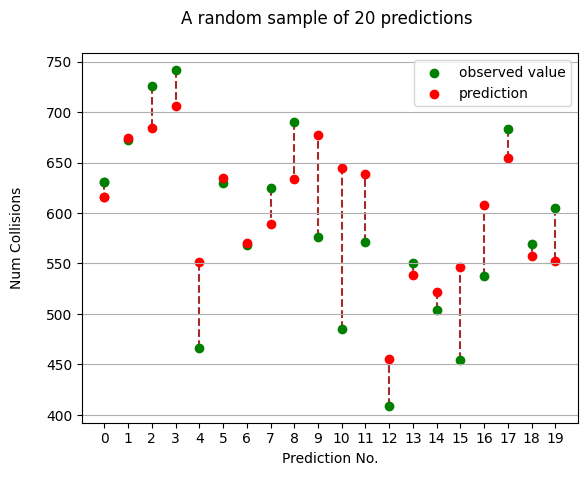

In [256]:
#zipping together the predictictions and ground truths 
predictions = list(zip(ytest, lr.predict(Xtest)) ) 

#randomly sampling 20 (ground truth, prediction) pairs. 
predictions_sample = random.sample(predictions, 20) 

#looping through each pair and plotting them with a line representing the difference between the 2 points. 
for idx, (ground_truth, prediction) in enumerate(predictions_sample):
        
        idx = str(idx)
        plt.plot( [idx, idx] , [ground_truth, prediction ], c = 'brown', linestyle = '--', zorder = 1 ) 

        plt.scatter(idx, ground_truth, c = 'green' ) 
        plt.scatter(idx, prediction, c = 'red' ) 

        if idx == '0':
                plt.scatter(idx, ground_truth, c= 'green' , zorder = 2, label = 'observed value') 
                plt.scatter(idx, prediction, c = 'red' , zorder = 2 , label = 'prediction' ) 

plt.grid(axis = 'y' )
plt.xlabel('Prediction No.\n')
plt.ylabel('Num Collisions\n')
plt.title('A random sample of 20 predictions \n' )
plt.legend(); 

Above is only a sample of 20 predictions samples so it not is wholly representative of the models performance across the entire test set. However, it allows us to  visualise the gap between predictions and observed values so we can get a feel for the models performance. 

## Computing Metrics 

In [257]:
mse = MSE(ytest, lr.predict(Xtest) ) 
r2 = r2_score(ytest, lr.predict(Xtest)) 
print(f' Mean Squared Error: {mse}, R Squared Score: {r2}')

 Mean Squared Error: 6024.830275516695, R Squared Score: 0.3463545609404407


An R2 score of ~35% of means the Linear Regression model with the set of features avaiable was able to capture ~35% of the total variance which exists inside of the distribution of the total number of collisions.  Another Interpretation of the R2 score, is that it represents the the percentage improvement in Mean Squared Error that the model achieves when compared to simply predicting the mean, in this case it would be predicting the mean number of total collisions across the dataset for each sample

Also, if we assume that the insurance company currently has no dynamic pricing strategy inplace. e.g. they are offering the same price to customers everyday regardless of the weather which means that they are assuming that the number of collisions each day is the same. Hence, the R2 score is implicitly comparing how much better our model is compared to the company offering a static price. (something along those lines)  

Our Linear Regression model was able to learn some of the patterns between our weather/time features and the total number of collisions in order to predict the total number of collisions on a given day. However, ~ 65% of the variance is left unexplained which is likely the result of numerous factors, I've listed a few possible ones below: 

- Our dataset is likely missing other features which are correlated with `NUM_COLLISIONS` E.g. the design of roads, special holidays etc. 

-  Linear Regression is probably too simple to learn the complex relationships which likely exist between our features and `NUM_COLLISIONS`

-  Car collisions are a result of random chance and so the total number of car collisions on any given day will remain somewhat unpredictable. 

## Investigating Feature Weights 

One advantage of using Linear Regression is its interpretability. A Linear Regression model learns a weight for each feature it is trained on, this makes it easier to understand how each individual feature contributes to the final predictiion. 

### Plotting feature weights 

Below is a function which retrieves all of the model weight for each of our features and plots them using a bar chart. 

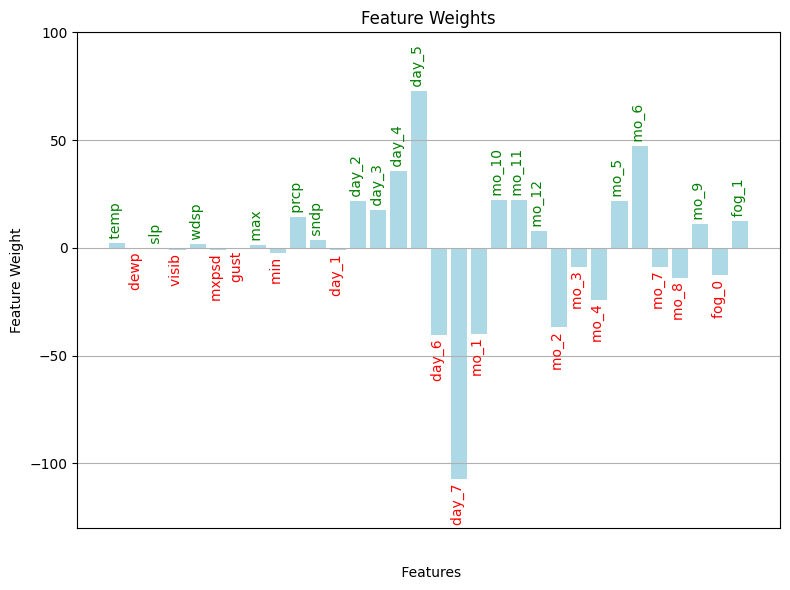

In [260]:
#zipping our features and weights together 
feature_weights = dict(zip(X.columns, lr.coef_ ) ) 

plt.figure(figsize=(8, 6))

plt.bar(np.arange(len(feature_weights)), feature_weights.values(), align = 'edge', color = 'lightblue') 
plt.xticks([])
# plt.xticks(np.arange(len(feature_weights)) , feature_weights.keys() , rotation = 90 ); 
for idx, (key,value) in enumerate(feature_weights.items() ):
    if value > 0: 
        plt.text(idx, value, s  = f' {key}', rotation = 90 ,ha = 'left' , va = 'bottom', c = 'green')
    else: 
         plt.text(idx, value, s  = f'{key} ', rotation = 90 ,ha = 'left' , va = 'top', c = 'red' )

plt.ylim(-130, 100 )
plt.grid() 
plt.title('Feature Weights') 
plt.xlabel('\n\n Features') 
plt.ylabel('Feature Weight')
plt.tight_layout() 

Each model weight provides information on the importance of each feature to the model which can be gauged by the magnitude of its weight, as well as the direction of correlation which is determined by the sign of the weight.

From the graph it can be seen that the most important feature / set of features are the day of week features, Each of these features have a relatively large weight attached to them, in particuluar the feature `day_7` which represents Sunday has the largest weight across all features around -110. It's worth noting that these feature weights correspond to the scatter plot of `day` of week against `NUM_COLLISIONS` where Sunday achieves the lowest mean `NUM_COLLISIONS` and Friday which represents `day_5` achieves the highest mean `NUM_COLLISIONS`. 

Similar to the weekly patterns we can see that our second most important feature/set of features is `mo`, January which is represented by `mo_1` has a weight ~ -40, which corresponds with the scatter plot betweein `mo` and `NUM_COLLISIONS`. However, `mo_6` has the highest feature weight despite september (`mo_9`) having the largest mean `NUM_COLLISIONS`, this is likely a result of Linear Regression being conditional. Linear Regression being conditional means that it measures the correlation between each feature and the target variable whilst holding every other variable constant, which is in contrast to correlation where we directly measure the correlation between 2 features without holding any other features constant. 

Despite the time based features `day` and `mo` being mostly highly prioritised by the Linear Regression model, some weather based features such as `fog` and `prcp` have relatively large weights and beat out some of the features relating to date such as `day_1` (Monday) and `mo_7` (July).

## Comments 

Overall, from the achieved R2 score as well as observing a set of predictions we can say that our model generaly performs quite poorly at predicting `NUM_COLLISIONS`, I believe that the poor model accuracy also reflects the nature the problem given that car crashes are determiend by human behaviour which can be influenced by some of the factors in our dataset but not remains extremly difficult to predict. 

Time based features such as day of week and month seem to be far more predictive of `NUM_COLLISIONS` when compared to weather based features. Given that our model is using both time and weather information to predict the number of collisions, when it comes to predicting the number of the collisions in the future the company will have to rely on weather forecasts which will then be used to forecast the total number of collisions on a day . This introduces additional margin for error as weather forecasts are not always accurate but given that there seems to be little correlation between our weather based features and `NUM_COLLISIONS` the impact may be minimal. 


(our model is not super predictive, as a result we must consider the costs of in correct predictions to the busy ( e.g. model could predict low collisions on a high collisions day leading to price of the insurance being set too low or vise versa the insurance set too high. 

Accuracy could potentially be improved by using a more complex model such as Suport Vector Regression (with a non linear kernel) or a Neural Network which are able to learn non linear relations and potentially capture a greater amount of the complexity which exists within the data.
Also,  the existing data could be cleaned of outliers e.g. removing public holidays etc which have inflated traffic volumes leading to more collisions but this not reflected inside of the data which can cause the model to fit to noise. 

Finally, as mentioned previously if the data was available it may be more useful to forecast the rate of collisions for a given day rather than the total number of collisions given that the total number of collisions may be highly correlated with the total number of drivers on a given day and does not accurately represent the risk of insuring drivers on a given day. 

# Task 3.  

One usecase where the module learnings could be applied at work is in content based recommendation systems, which leverage metadata to learn numerical/vector represenations for items. 

Some examples of metadata which is often used inside of content based recommender system are: genre, format, rating, duration and age rating. I could apply the module learnings around feature correlation(K5/ S1) to explore the correlations between model features to ensure that my features are not highly correlated to each other. As, if two features are highly correlated with each other then they likely contain similar information making one of them redundant as our model will likely achieve the same/similar performance with only one of them. 

This module could help me make more informed decisions around feature engineering(S2) as it is has improved my understanding around correlation which can be applied feature engineering when designing content based recommender systems. 